

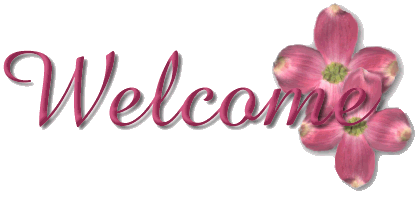

                                                    
 Team member:

- Dina Alwaneh.
- Eleen Kmail.
- Rahaf Shami.
*****************************************************

### Here I read the Python code as "codeFile" ,
### after that we will go through each line of the codeFile
### and then add it to the "stackCode" list . 

In [1]:
stackCode = []
with open('PythonCode.py', 'r') as codeFile:
    for line in codeFile:      
        stackCode.append(line)

In [2]:
#print stackCode :
stackCode

['\n',
 'class program:\n',
 ' \n',
 '    \n',
 '    def Calculate(number:int,divisor:int):\n',
 '        result = number/divisor;\n',
 '        return result\n',
 '\n',
 '\n',
 '    def GetStatusValue(status:int):\n',
 '        if status == -1:\n',
 '            print("fail")\n',
 '        elif status >= 1:\n',
 '            print("success")      \n',
 '        elif status <= 0:\n',
 '            print("invalid")\n',
 '            \n',
 '            \n',
 '            \n',
 '    def checkStatus():\n',
 '        GetStatusValue(2,5)\n',
 '        GetStatusValue("fail")\n',
 '        \n',
 '    \n',
 '    def parameters(a:int,b:str,c:chr,d:int):\n',
 '        return 1\n',
 '    \n',
 '    \n',
 '    def unReachable(status:int):\n',
 '        if status == 0:\n',
 '            return "fail";\n',
 '                \n',
 '        elif status == 0:\n',
 '            return 0   \n',
 '                   \n',
 '        return "Pass"\n',
 '                \n',
 '        print("Exit")   \n',
 '  

### Get the start index for each function in the code
****************************************

In [3]:
startIndexOfFunction = []
for line in stackCode:
    if ("def" in line):
        startIndexOfFunction.append(stackCode.index(line))       

In [4]:
startIndexOfFunction
#If Result = > [1, 4, 11] >> thats mean that we have function start at index 1 , function start at index 4 and function start at index 11 . 

[4, 9, 19, 24, 28, 41, 45]

####  Here I have stored all the functions inside functionsList "PS : the start of some function is the end of another":
***********************


In [5]:
functionsList=[]
for i in range(0,len(startIndexOfFunction)):
    if(i==(len(startIndexOfFunction)-1)):
        functionsList.append(stackCode[startIndexOfFunction[i]:len(stackCode)])
        break;
    functionsList.append(stackCode[startIndexOfFunction[i]:startIndexOfFunction[i+1]])

In [6]:
functionsList
#The result is list of list each list in the parent list contains one function. 

[['    def Calculate(number:int,divisor:int):\n',
  '        result = number/divisor;\n',
  '        return result\n',
  '\n',
  '\n'],
 ['    def GetStatusValue(status:int):\n',
  '        if status == -1:\n',
  '            print("fail")\n',
  '        elif status >= 1:\n',
  '            print("success")      \n',
  '        elif status <= 0:\n',
  '            print("invalid")\n',
  '            \n',
  '            \n',
  '            \n'],
 ['    def checkStatus():\n',
  '        GetStatusValue(2,5)\n',
  '        GetStatusValue("fail")\n',
  '        \n',
  '    \n'],
 ['    def parameters(a:int,b:str,c:chr,d:int):\n',
  '        return 1\n',
  '    \n',
  '    \n'],
 ['    def unReachable(status:int):\n',
  '        if status == 0:\n',
  '            return "fail";\n',
  '                \n',
  '        elif status == 0:\n',
  '            return 0   \n',
  '                   \n',
  '        return "Pass"\n',
  '                \n',
  '        print("Exit")   \n',
  '        re

### Our Static Analyzer Tool :)
*****************

## Check list functions implementation :
...................................................................................................................

# 1. Divide by zero :
***

#### this function will check if the function which is passes to static analyzer
#### have a division or not to applay TestDivideByZero function on it .
***


In [7]:
def divisionIsFound(function):
    for line in function:
        if "/" in line:
            return True
    return False

####  TestDivideByZero function will receive the function
#### and It passes each line by it and stores the arithmetic sentences inside ArithmeticSentences list ,
#### in addetion it will store the location of the arithmetic sentence relative to the code to be checked in the lineIndex list
#### then it will  passes each Arithmetic Sentence ArithmeticSentences list to get the denominator 
#### and check if the value of the denominator is not equal to zero before the arithmetic operation applied
#### finally it will write the bug on  report file if it is found and its line .


In [8]:
def TestDivideByZero(function):
    ArithmeticSentences = []
    lineIndex=[]
    for line in function:
        if "/" in line:
            ArithmeticSentences.append(line)
            lineIndex.append(stackCode.index(line))
 
    flag=1
    for ArithmeticSentence in ArithmeticSentences:
            divisionSymbolIndex =  ArithmeticSentence.index("/")
            denominator = ArithmeticSentence[divisionSymbolIndex+1:len(ArithmeticSentence)-2]
            for i in range(0,function.index(ArithmeticSentence)):
                if "if("+denominator+" == 0)" not in function[i]:
                    flag=0
            if(flag==0):
                reportFile.write("* divide by zero error -> " + denominator +" may = 0 at line -> "+str(lineIndex[ArithmeticSentences.index(ArithmeticSentence)]+1) +"\n \n")

# 2. Null pointer exception :
***

#### PointerIsFound function will check if the function which is passes to static analyzer
#### have a dot  symbol on other word check if the function have a ponter call its proirties 
#### or not to applay TestNullPointer function on it .
***


In [9]:
def PointerIsFound(function):
    for line in function:
        if "." in line:
            return True
    return False

###  Get variable Name ,  its index relative to the function itself + its index relative to the code to be checked :

In [10]:
def GetObjectNameAndindex(function):
    objectName = ""
    for line in function: 
        if "." in line :
            indexOfDot= line.index(".");
            indexOfLineAtFunc = function.index(line)
            indexOfLineAtCode = stackCode.index(line)
            for i in range(indexOfDot-1, -1, -1):
                if(line[i] == " "):
                    break;
                else:
                    objectName+=line[i]
                    
    return(objectName[::-1],indexOfLineAtFunc,indexOfLineAtCode)

#### TestNullPointer function will through on the passed function from index = 0 to the index of code which may caouse null pointer error . 
#### to check if we have an if statment that chek if the variable ! = Null .

In [11]:
def TestNullPointer(function):
    VariableName,indexOfLine,indexOfLineAtCode = GetObjectNameAndindex(function)
    flag=1
    for i in range(0,indexOfLine):
        if "if("+VariableName+" != None)" not in function[i]:
            flag=0
    if(flag==0):        
        reportFile.write("* Null pointer exception :" + VariableName +" may = NULL at line -> "+ str(indexOfLineAtCode+1) +"\n \n" )
                

# 3. Hiding/ burying exceptions :
***

#### GetStartIndexOfExcept function  will get the start index for each except in python code and return startIndexOfExcept list .
***


In [12]:
def GetStartIndexOfExcept():
    startIndexOfExcept = []
    for line in stackCode :
        if ("except" in line):
            startIndexOfExcept.append(stackCode.index(line))   
    return startIndexOfExcept

In [13]:
#print start Index Of each Except
startIndexOfExcept = GetStartIndexOfExcept()
startIndexOfExcept

[48, 50]

#### GetExceptsList function will get all the blocks for exceps in the code :

#### The start index of except two is the end index of except one and so on .

In [14]:
def GetExceptsList(startIndexOfExcept):
    exceptsList=[]
    for i in range(0,len(startIndexOfExcept)):
        if(i==(len(startIndexOfExcept)-1)):
            exceptsList.append(stackCode[startIndexOfExcept[i]:len(stackCode)])
            break;
        exceptsList.append(stackCode[startIndexOfExcept[i]:startIndexOfExcept[i+1]])
    return exceptsList

In [15]:
#Call GetExceptsList and stor the result which represent array of list -> each child is one except with is body . 
exceptsList = GetExceptsList(startIndexOfExcept)

#### TestHidingexception function will pass on eech except block at exceptsList and chick if it has an action or not :

In [16]:
def TestHidingExcption():
    for line in exceptsList:        
        flag=0
        for i in range(1,len(line)):
            if((len(line[i]) - len(line[i].lstrip()))<=(len(line[0]) - len(line[0].lstrip()))):
                break;

            elif(not(line[i].strip()) or "#" in line[i] ) :
                flag=0
            else:
                flag=1
                break
            if(flag==0):
                reportFile.write("* Hiding/burying exceptions at line -> "+ str(startIndexOfExcept[exceptsList.index(line)]+2)+ "\n \n")

# 4. Magic number :
***
#### this function will check if the function which is passes to static analyzer
have a function or not to applay TestMagicNum function on it 
***


#### containsNumber this function will check if the strig have a number like status == 1: or status == 1 : with spase 
#### 1 is number in each

In [17]:
import string
def containsNumber(line):
    result = False
    number = 0
    try:
        for value in line.split():
            if (int(value.strip(string.punctuation)) or value.strip(string.punctuation)=="0"):
                number=int(value.strip(string.punctuation))
                result = True
                break
    except ValueError:
        pass
    
    return (result,number)

***
#### TestMagicNum function will receive the "function" , create a list to put "==", "<=", ">=", ">", "<", "!=" , "return" , "+" , "-"
#### pass on line by line in the function , pass on item by item in the list then pass on item by item in the line 
#### check if found number after any item in the list -->that mean the number is magic number 
#### to print parameters as a magic number -->check if found "(" in line
#### then store the index of next if finded "(" "," ")" and check if the item is digit >>if yes print the magic number 
#### finally it will write the bug on report file if it is found and its line .
***

In [18]:
def TestMagicNumber(function):
    ListOfStatus = ["==", "<=", ">=", ">", "<", "!=" , "return"]
    for line in function:
        for item in ListOfStatus:
            if item in line:
                if line[line.index(item)::].split(' ', 1)[0] == item :
                    isNumber = line[line.index(item)+len(item)+1::]
                    if containsNumber(isNumber)[0] == True:
                        reportFile.write("* Magic Number " +str(containsNumber(isNumber)[1])+" exist -> "   + " at line -> "+str(stackCode.index(line)+1)+"\n \n")     
        
        if "(" in line:
            isNumber = line[line.index('(')+1::]
            isNumber = isNumber[:isNumber.index(')')] 
            isNumber = isNumber.split(',')
            for item in isNumber:
                if(item.isdigit()):
                    reportFile.write("* Magic Number " +str(item)+" exist -> "   + " at line -> "+str(stackCode.index(line)+1)+"\n \n")

# 5. Do the attributes (e.g., data type and size) :
***

#### This function returns number and data type of function parameters 
***


In [19]:
def CheckParamsProperties(function):
    parameters=function[function.index("(")+1: function.index(")")]
    parameters=parameters.split(",") 
    dataTypeOFParams=[]
    numberOfParams=len(parameters)
 
    for param in parameters: 
        dataTypeOFParams.append(param[param.index(':')+1:])
        
    return (dataTypeOFParams,numberOfParams)

#### This function returns number and data type of function call arguments

In [20]:
def CheckArgumentProperties(function):
    parameters=function[function.index("(")+1: function.index(")")]
    parameters=parameters.split(",")
    numberOfParams=len(parameters)
    dataTypeOFParams=[]
    
    for param in parameters:
        if "'" in param:
            dataTypeOFParams.append("chr")   
        elif param.isdigit():
            dataTypeOFParams.append("int") 
        else:
            dataTypeOFParams.append("str")
    return (dataTypeOFParams,numberOfParams)



### this function check if there is function call and return list of function call

In [21]:
def CheckIfThereFunctionCall(function):
    functionsCall=[]
    for functionCall in function:
        if functionCall==function[0]:
            continue
        if "(" and ")" in functionCall and "print" not in functionCall:
            functionsCall.append(functionCall)
            
    return functionsCall

## this function if  the arguments and parameters matched and write on report file

In [22]:
def CheckIfSameParametersAndArrguments(function):
    
        functionsCall=CheckIfThereFunctionCall(function)
        for functionCall in functionsCall:
            functionCallName=functionCall[:functionCall.index("(")]
            functionCallName=functionCallName.replace(' ','')
            for i in functionsList:
                functionName=i[0][8 :i[0].index("(")]
                if functionCallName == functionName:
                    numOfFuncPar=CheckParamsProperties(i[0])[1]
                    numOfCallFuncPar=CheckArgumentProperties(functionCall)[1]
                    
                    typeOfFuncPar=CheckParamsProperties(i[0])[0]
                    typeOfCallFuncPar=CheckArgumentProperties(functionCall)[0]
                    
                    if numOfFuncPar!=numOfCallFuncPar:
                        reportFile.write("* Number of attributes of function call "+functionCall.replace(" ",'')+"  at line -> "+str(stackCode.index(functionCall)+1)+" did not match the number of parameters of the function \n \n")
                    
                    if typeOfFuncPar !=  typeOfCallFuncPar:
                        reportFile.write("* data type of attributes of function call "+functionCall.replace(" ",'')+"  at line -> "+str(stackCode.index(functionCall)+1)+" did not match the data type of parameters of the function \n \n")
                        

# 6. no more than three parameters for the methods :
***

#### TestNumOfParam function will receive the "function" and take the first line in function where the parameters is .
####  then count the number of commas to check if the  parameters more than 4 or not .7
***

In [23]:
def TestNumOfParam(function):   
    functionDefine = function[0]
    parameterCount = functionDefine.count(",")          
    if(parameterCount >= 3):
        reportFile.write("* more than three parameters -> " + str((parameterCount+1))  + " parameters in function at line -> "+str(stackCode.index(functionDefine)+1) +"\n \n")         

# 7. Unreachable code :
***




#### This function checks if there is unreachable code :
#### First case (return) here function will check if there lines after return line will the function will never reach them by calculating number of spaces

In [24]:
def CheckUnReachableCase1(function):
    
    defTab=len(function[0]) - len(function[0].lstrip())
    for i in range(1,len(function)):            
        if "return" in function[i]:
            if (len(function[i]) - len(function[i].lstrip())) == defTab*2:
                for j in range(i+1,len(function)):
                    if(len(function[j].lstrip())>0):
                        reportFile.write("* Unreachable code at line -> "+str(stackCode.index(function[j])+1)+"\n \n")
                        
                break;

#### Second case (if statement) here function will check if there lines in if sataement scopes which the function will never reach them by comparaing if statements conditions 

In [25]:
def CheckUnReachableCase2(function):

    for i in range(1,len(function)):            
        if "if" in function[i]:
            #function[i]=function[i].lstrip()
            ifCondition=function[i][function[i].index("f")+2: function[i].index(":")]
            ifTab=len(function[i]) - len(function[i].lstrip())
            for j in range(i+1, len(function)):
                if "elif" in function[j]:
                    #function[j]=function[j].lstrip()
                    elifCondition=function[j][function[j].index("f")+2: function[j].index(":")]
                    elifTab=len(function[j]) - len(function[j].lstrip())
                    if ifTab == elifTab:
                        if ifCondition == elifCondition: 
                            for z in range(j+1, len(function)):
                                nextTab=len(function[z]) - len(function[z].lstrip())
                               
                                if nextTab <= elifTab:
                                    break
                                
                                else:
                                    if(len(function[z].lstrip())) !=0:
                                        reportFile.write("* Unreachable code at line -> "+str(stackCode.index(function[z])+1)+"  "+str(function[z].strip())+"\n \n")
                        

## implementation of our static analyzer  tool :

#### Create reporte file to save the bygs :

In [26]:
reportFile= open("Report.txt","w+")

### this StaticAnalyzerTool function will receive one function and check each line on it to see if it has any sentence that may cause any bug from the check list and if true it will call the tester functuin for this bug to print the details on text file .

In [27]:
def StaticAnalyzerTool(function):
    
    #Divide by zero:
    if(divisionIsFound(function)==True):
        TestDivideByZero(function)
    
    #Null pointer exception:
    if(PointerIsFound(function)==True):  
        TestNullPointer(function)

    #Magic number:
    TestMagicNumber(function)

    #Do the parameters
    if(CheckIfThereFunctionCall(function)):
        CheckIfSameParametersAndArrguments(function)
    
    #parameters:
    TestNumOfParam(function)
    
     
    #Unreachable code
    CheckUnReachableCase1(function)
    CheckUnReachableCase2(function)

#### through on each function which is stored inside the functionaList , pass it to the Static Analyzer Fun to test it
***

In [28]:
for function in functionsList:   
    StaticAnalyzerTool(function)

#Hiding/burying exceptions for all code not function :
TestHidingExcption()      

In [29]:
reportFile.close()